In [1]:
import globals as gl
from main import main
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import warnings
warnings.filterwarnings("ignore")
from plot import make_yref
import rsatoolbox as rsa
import numpy as np
import os


Base directory found: /Volumes/diedrichsen_data$/data/SensoriMotorPrediction/
Base directory: /Volumes/diedrichsen_data$/data/SensoriMotorPrediction/


# **Behaviour**

## **Force response during training**

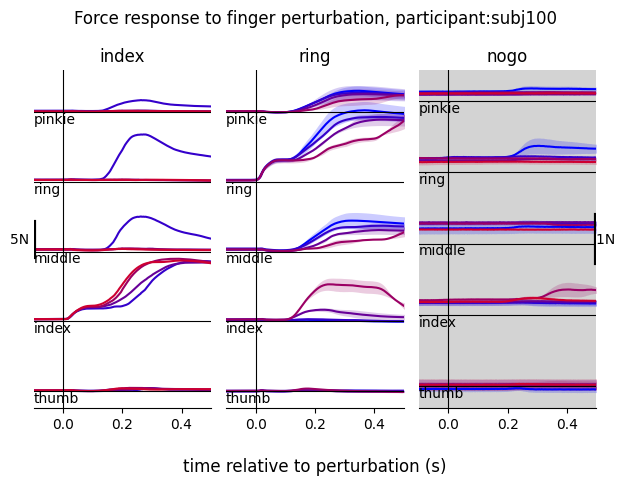

In [2]:
experiment = 'smp2'
session = 'training'
participant_id = ['subj100']
vsep_go = 10
vsep_nogo = 1.5
fig, axs = plt.subplots(ncols=3, sharex=True)
fig, axs[0] = main('PLOT:timec_force', experiment, participant_id=participant_id, session=session, stimFinger='index', GoNogo='go',fig=fig, axs=axs[0], vsep=10)
fig, axs[1] = main('PLOT:timec_force', experiment, session=session, stimFinger='ring', GoNogo='go',fig=fig, axs=axs[1], vsep=vsep_go)
fig, axs[2] = main('PLOT:timec_force', experiment, session=session, GoNogo='nogo',fig=fig, axs=axs[2], vsep=vsep_nogo)

axs[1].sharey(axs[0])

axs[0].set_xlim([-.1, .5])
axs[0].spines[['top', 'right', 'left']].set_visible(False)
axs[0].axvline(0, ls='-', color='k', lw=.8)
axs[0].set_yticks([])
axs[0].set_title('index')

axs[1].spines[['top', 'right', 'left']].set_visible(False)
axs[1].axvline(0, ls='-', color='k', lw=.8)
axs[1].set_title('ring')

axs[2].spines[['top', 'right', 'left']].set_visible(False)
axs[2].axvline(0, ls='-', color='k', lw=.8)
axs[2].set_yticks([])
axs[2].set_title('nogo')
axs[2].set_facecolor('lightgrey')

for ax in axs[:2]:
    for c, ch in enumerate(gl.channels['mov']):
        ax.axhline(c * vsep_go, ls='-', color='k', lw=.8)
        ax.text(ax.get_xlim()[0], c * vsep_go, ch, va='top', ha='left')
        
for c, ch in enumerate(gl.channels['mov']):
    axs[2].axhline(c * vsep_nogo, ls='-', color='k', lw=.8)
    axs[2].text(axs[2].get_xlim()[0], c * vsep_nogo, ch, va='top', ha='left')

make_yref(axs[0], reference_length=5, pos='left')
make_yref(axs[2], reference_length=1, pos='right')

fig.supxlabel('time relative to perturbation (s)')

fig.suptitle(f'Force response to finger perturbation, participant:{participant_id[0]}')

fig.tight_layout()

# fig.savefig(os.path.join(gl.baseDir, experiment, 'figures', 'force_response_training.svg'))


## **Force response during scanning**

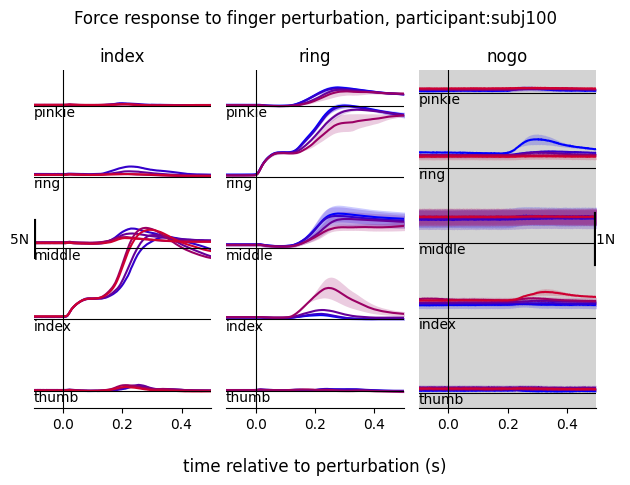

In [3]:
experiment = 'smp2'
session = 'scanning'
participant_id = ['subj100']
vsep_go = 10
vsep_nogo = 1.5
fig, axs = plt.subplots(ncols=3, sharex=True)
fig, axs[0] = main('PLOT:timec_force', experiment, participant_id=participant_id, session=session, stimFinger='index', GoNogo='go',fig=fig, axs=axs[0], vsep=10)
fig, axs[1] = main('PLOT:timec_force', experiment, session=session, stimFinger='ring', GoNogo='go',fig=fig, axs=axs[1], vsep=vsep_go)
fig, axs[2] = main('PLOT:timec_force', experiment, session=session, GoNogo='nogo',fig=fig, axs=axs[2], vsep=vsep_nogo)

axs[1].sharey(axs[0])

axs[0].set_xlim([-.1, .5])
axs[0].spines[['top', 'right', 'left']].set_visible(False)
axs[0].axvline(0, ls='-', color='k', lw=.8)
axs[0].set_yticks([])
axs[0].set_title('index')

axs[1].spines[['top', 'right', 'left']].set_visible(False)
axs[1].axvline(0, ls='-', color='k', lw=.8)
axs[1].set_title('ring')

axs[2].spines[['top', 'right', 'left']].set_visible(False)
axs[2].axvline(0, ls='-', color='k', lw=.8)
axs[2].set_yticks([])
axs[2].set_title('nogo')
axs[2].set_facecolor('lightgrey')

for ax in axs[:2]:
    for c, ch in enumerate(gl.channels['mov']):
        ax.axhline(c * vsep_go, ls='-', color='k', lw=.8)
        ax.text(ax.get_xlim()[0], c * vsep_go, ch, va='top', ha='left')
        
for c, ch in enumerate(gl.channels['mov']):
    axs[2].axhline(c * vsep_nogo, ls='-', color='k', lw=.8)
    axs[2].text(axs[2].get_xlim()[0], c * vsep_nogo, ch, va='top', ha='left')

make_yref(axs[0], reference_length=5, pos='left')
make_yref(axs[2], reference_length=1, pos='right')

fig.supxlabel('time relative to perturbation (s)')

fig.suptitle(f'Force response to finger perturbation, participant:{participant_id[0]}')

fig.tight_layout()


# **HRF** 

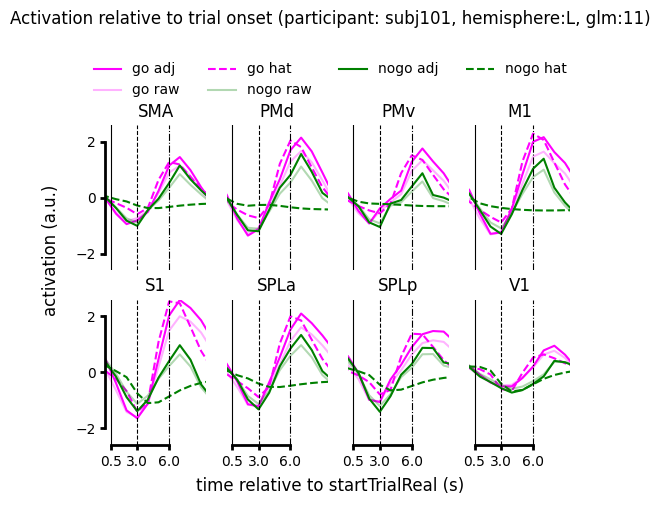

In [14]:
experiment = 'smp2'
Hem = 'L'
roi = ['SMA', 'PMd', 'PMv', 'M1', 'S1', 'SPLa', 'SPLp', 'V1']
r = 0
glm = 11
participant_id=['subj101']
fig, axs = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True, figsize=(6, 5))
for i in range(2):
    for j in range(4):
        fig, axs[i, j] = main('PLOT:hrf_roi', experiment, participant_id=participant_id, glm=glm, roi=roi[r], Hem=Hem, fig=fig, axs=axs[i, j])
        axs[i, j].axvline(.5, color='k', ls='-', lw=.8)
        axs[i, j].axvline(3, color='k', ls='--', lw=.8)
        axs[i, j].axvline(6, color='k', ls='-.', lw=.8)
        axs[i, j].set_title(roi[r])
        axs[i, j].set_xlim([0, 9.5])
        axs[i, j].set_xticks([.5, 3, 6])

        # Remove unnecessary spines
        axs[i, j].spines['top'].set_visible(False)
        axs[i, j].spines['right'].set_visible(False)

        # Hide left and bottom spines based on row/column
        if i == 0:
            axs[i, j].spines['bottom'].set_visible(False)  # First row, hide bottom spine
        if j > 0:
            axs[i, j].spines['left'].set_visible(False)  # Hide left spines except first column
        
        # Hide ticks for non-left columns and first row
        if j > 0:
            axs[i, j].tick_params(axis='y', left=False)
        if i == 0:
            axs[i, j].tick_params(axis='x', bottom=False)

        r += 1

# Ensure left spines and ticks are visible for the first column
for i in range(2):
    axs[i, 0].spines['left'].set_visible(True)  # Show left spine for first column
    axs[i, 0].spines['left'].set_linewidth(2)  # Set left spine width for first column
    axs[i, 0].set_ylim([-2.6, 2.6])
    axs[i, 0].spines['left'].set_bounds([-2, 2])
    axs[i, 0].tick_params(axis='y', width=2)  # Show y-axis ticks for the first column

# Ensure bottom spines and ticks are visible for the second row
for j in range(4):
    axs[1, j].spines['bottom'].set_visible(True)  # Show bottom spine for second row
    axs[1, j].spines['bottom'].set_linewidth(2)  # Set bottom spine width for second row
    axs[1, j].spines['bottom'].set_bounds([.5, 6])
    axs[1, j].tick_params(axis='x', width=2)  # Show x-axis ticks for second row

# Legend and labels
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=4, bbox_to_anchor=(0.5, .9), frameon=False)
fig.supylabel('activation (a.u.)')
fig.supxlabel('time relative to startTrialReal (s)')
fig.suptitle(f'Activation relative to trial onset (participant: {participant_id[0]}, hemisphere:{Hem}, glm:{glm})')

fig.subplots_adjust(top=0.75)


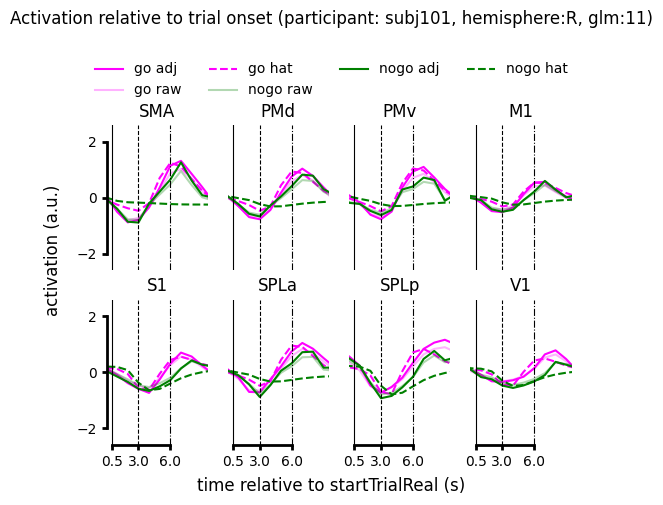

In [12]:
experiment = 'smp2'
Hem = 'R'
roi = ['SMA', 'PMd', 'PMv', 'M1', 'S1', 'SPLa', 'SPLp', 'V1']
r = 0
glm = 11
participant_id=['subj101']
fig, axs = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True, figsize=(6, 5))
for i in range(2):
    for j in range(4):
        fig, axs[i, j] = main('PLOT:hrf_roi', experiment, participant_id=participant_id, glm=glm, roi=roi[r], Hem=Hem, fig=fig, axs=axs[i, j])
        axs[i, j].axvline(.5, color='k', ls='-', lw=.8)
        axs[i, j].axvline(3, color='k', ls='--', lw=.8)
        axs[i, j].axvline(6, color='k', ls='-.', lw=.8)
        axs[i, j].set_title(roi[r])
        axs[i, j].set_xlim([0, 9.5])
        axs[i, j].set_xticks([.5, 3, 6])

        # Remove unnecessary spines
        axs[i, j].spines['top'].set_visible(False)
        axs[i, j].spines['right'].set_visible(False)

        # Hide left and bottom spines based on row/column
        if i == 0:
            axs[i, j].spines['bottom'].set_visible(False)  # First row, hide bottom spine
        if j > 0:
            axs[i, j].spines['left'].set_visible(False)  # Hide left spines except first column
        
        # Hide ticks for non-left columns and first row
        if j > 0:
            axs[i, j].tick_params(axis='y', left=False)
        if i == 0:
            axs[i, j].tick_params(axis='x', bottom=False)

        r += 1

# Ensure left spines and ticks are visible for the first column
for i in range(2):
    axs[i, 0].spines['left'].set_visible(True)  # Show left spine for first column
    axs[i, 0].spines['left'].set_linewidth(2)  # Set left spine width for first column
    axs[i, 0].set_ylim([-2.6, 2.6])
    axs[i, 0].spines['left'].set_bounds([-2, 2])
    axs[i, 0].tick_params(axis='y', width=2)  # Show y-axis ticks for the first column

# Ensure bottom spines and ticks are visible for the second row
for j in range(4):
    axs[1, j].spines['bottom'].set_visible(True)  # Show bottom spine for second row
    axs[1, j].spines['bottom'].set_linewidth(2)  # Set bottom spine width for second row
    axs[1, j].spines['bottom'].set_bounds([.5, 6])
    axs[1, j].tick_params(axis='x', width=2)  # Show x-axis ticks for second row

# Legend and labels
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=4, bbox_to_anchor=(0.5, .9), frameon=False)
fig.supylabel('activation (a.u.)')
fig.supxlabel('time relative to startTrialReal (s)')
fig.suptitle(f'Activation relative to trial onset (participant: {participant_id[0]}, hemisphere:{Hem}, glm:{glm})')

fig.subplots_adjust(top=0.75)

# **Activity**

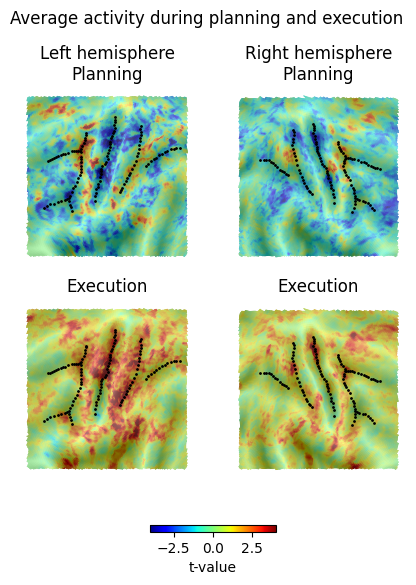

In [62]:
glm = 11
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(5, 6))
participant_id=['subj100']

vmin, vmax = -4, 4

Hem = 'L'
regressor=['0%', '25%', '50%', '75%', '100%']
fig, axs[0, 0] = main('PLOT:flatmap', experiment, participant_id=participant_id, glm=glm, Hem=Hem, regressor=regressor, vmin=vmin, vmax=vmax,
                      fig=fig, axs=axs[0, 0], xlim=[-80, 120], ylim=[-50, 150])

Hem = 'R'
fig, axs[0, 1] = main('PLOT:flatmap', experiment, glm=glm, Hem=Hem, regressor=regressor, vmin=vmin, vmax=vmax,
                      fig=fig, axs=axs[0, 1], xlim=[-120, 80], ylim=[-60, 140])
 
Hem = 'L'
regressor=['0%,index', '25%,index', '50%,index', '75%,index', '100%,index', '0%,ring', '25%,ring', '50%,ring', '75%,ring', '100%,ring']
fig, axs[1, 0] = main('PLOT:flatmap', experiment, glm=glm, Hem=Hem, vmin=vmin, vmax=vmax, regressor=regressor, 
                      fig=fig, axs=axs[1, 0], xlim=[-80, 120], ylim=[-50, 150])

Hem = 'R'
fig, axs[1, 1] = main('PLOT:flatmap', experiment, glm=glm, Hem=Hem, vmin=vmin, vmax=vmax, regressor=regressor,
                      fig=fig, axs=axs[1, 1], xlim=[-120, 80], ylim=[-60, 140])

# make colorbar
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = ScalarMappable(norm=norm, cmap='jet')
cbar = fig.colorbar(sm, ax=[axs[1, 0], axs[1, 1]], orientation='horizontal', fraction=0.03)
cbar.set_label('t-value')

# cosmetic
axs[0, 0].set_title('Left hemisphere\nPlanning')
axs[0, 1].set_title('Right hemisphere\nPlanning')
axs[1, 0].set_title('Execution')
axs[1, 1].set_title('Execution')

fig.suptitle('Average activity during planning and execution')
fig.subplots_adjust(top=0.85, bottom=.2)


# **Cue representation**

## **Planning**

Text(0.5, 0.98, 'participant: subj100, hemisphere: L')

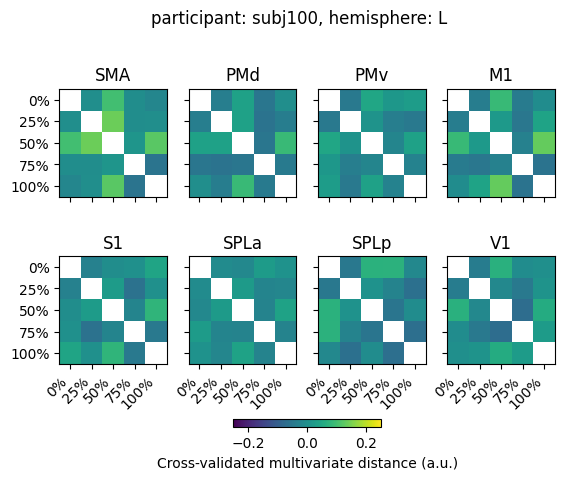

In [64]:
Hem = 'L'
roi = ['SMA', 'PMd', 'PMv', 'M1', 'S1', 'SPLa', 'SPLp', 'V1']
vmin, vmax = -.25, .25
participant_id='subj100'
glm = 11
r = 0
fig, axs = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True)
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        rdms = rsa.rdm.load_rdm(os.path.join(gl.baseDir, experiment, gl.rdmDir, participant_id, f'glm{glm}.{Hem}.{roi[r]}.hdf5'))
        rdms = rdms.subset_pattern(by='conds', value=['0%', '25%', '50%', '75%', '100%'])
        
        cax = rsa.vis.show_rdm_panel(
                rdms, axs[i, j], rdm_descriptor='roi', cmap='viridis', vmin=vmin, vmax=vmax
            )
        axs[i, j].set_xticks(np.arange(len(rdms.pattern_descriptors['conds'])))
        axs[i, j].set_xticklabels(rdms.pattern_descriptors['conds'], rotation=45, ha='right')
        axs[i, j].set_yticks(axs[i, j].get_xticks())
        axs[i, j].set_yticklabels(rdms.pattern_descriptors['conds'])
        axs[i, j].set_title(roi[r])
        
        # axs[i, j].axhline(0, color='k', ls='-', lw=.8)
        # axs[i, j].axvline(0, color='k', ls='-', lw=.8)
        r += 1

cbar = fig.colorbar(cax, ax=axs, orientation='horizontal', fraction=.02)
cbar.set_label('Cross-validated multivariate distance (a.u.)')
fig.suptitle(f'participant: {participant_id}, hemisphere: {Hem}')


Text(0.5, 0.98, 'participant: subj100, hemisphere: R')

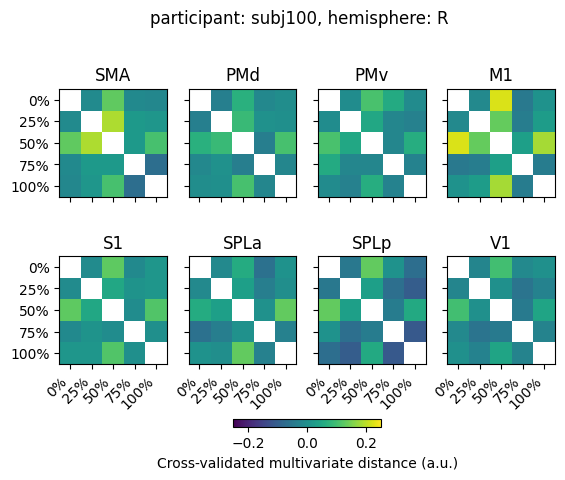

In [65]:
Hem = 'R'
roi = ['SMA', 'PMd', 'PMv', 'M1', 'S1', 'SPLa', 'SPLp', 'V1']
vmin, vmax = -.25, .25
participant_id='subj100'
glm = 11
r = 0
fig, axs = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True)
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        rdms = rsa.rdm.load_rdm(os.path.join(gl.baseDir, experiment, gl.rdmDir, participant_id, f'glm{glm}.{Hem}.{roi[r]}.hdf5'))
        rdms = rdms.subset_pattern(by='conds', value=['0%', '25%', '50%', '75%', '100%'])
        
        cax = rsa.vis.show_rdm_panel(
                rdms, axs[i, j], rdm_descriptor='roi', cmap='viridis', vmin=vmin, vmax=vmax
            )
        axs[i, j].set_xticks(np.arange(len(rdms.pattern_descriptors['conds'])))
        axs[i, j].set_xticklabels(rdms.pattern_descriptors['conds'], rotation=45, ha='right')
        axs[i, j].set_yticks(axs[i, j].get_xticks())
        axs[i, j].set_yticklabels(rdms.pattern_descriptors['conds'])
        axs[i, j].set_title(roi[r])
        
        # axs[i, j].axhline(0, color='k', ls='-', lw=.8)
        # axs[i, j].axvline(0, color='k', ls='-', lw=.8)
        r += 1

cbar = fig.colorbar(cax, ax=axs, orientation='horizontal', fraction=.02)
cbar.set_label('Cross-validated multivariate distance (a.u.)')
fig.suptitle(f'participant: {participant_id}, hemisphere: {Hem}')


## **Execution**

plotting...glm10.L.SMA.hdf5
plotting...glm10.L.PMd.hdf5
plotting...glm10.L.PMv.hdf5
plotting...glm10.L.M1.hdf5
plotting...glm10.L.S1.hdf5
plotting...glm10.L.SPLa.hdf5
plotting...glm10.L.SPLp.hdf5
plotting...glm10.L.V1.hdf5


Text(0.5, 0.98, 'participant:subj100, hemisphere: L')

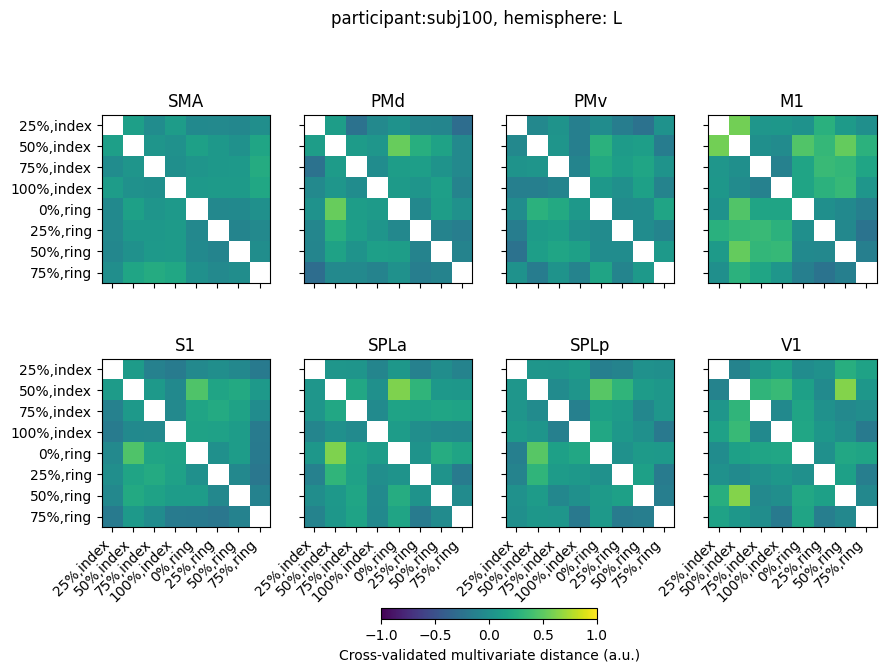

In [69]:
Hem = 'L'
r = 0
vmin, vmax = -1, 1
participant_id='subj100'
fig, axs = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True, figsize=(10, 7))
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        print(f'plotting...glm10.{Hem}.{roi[r]}.hdf5')
        rdms = rsa.rdm.load_rdm(os.path.join(gl.baseDir, experiment, gl.rdmDir, participant_id,f'glm{glm}.{Hem}.{roi[r]}.hdf5'))
        rdms = rdms.subset_pattern(by='conds', value=['25%,index', '50%,index', '75%,index', '100%,index',
                                                      '0%,ring', '25%,ring', '50%,ring', '75%,ring',])
        
        cax = rsa.vis.show_rdm_panel(
                rdms, axs[i, j], rdm_descriptor='roi', cmap='viridis', vmin=vmin, vmax=vmax
            )
        axs[i, j].set_xticks(np.arange(len(rdms.pattern_descriptors['conds'])))
        axs[i, j].set_xticklabels(rdms.pattern_descriptors['conds'], rotation=45, ha='right')
        axs[i, j].set_yticks(axs[i, j].get_xticks())
        axs[i, j].set_yticklabels(rdms.pattern_descriptors['conds'])
        axs[i, j].set_title(roi[r])
        
        # axs[i, j].axhline(0, color='k', ls='-', lw=.8)
        # axs[i, j].axvline(0, color='k', ls='-', lw=.8)
        r += 1
        
cbar = fig.colorbar(cax, ax=axs, orientation='horizontal', fraction=.02)
cbar.set_label('Cross-validated multivariate distance (a.u.)')
fig.suptitle(f'participant:{participant_id}, hemisphere:{Hem}')


plotting...glm10.R.SMA.hdf5
plotting...glm10.R.PMd.hdf5
plotting...glm10.R.PMv.hdf5
plotting...glm10.R.M1.hdf5
plotting...glm10.R.S1.hdf5
plotting...glm10.R.SPLa.hdf5
plotting...glm10.R.SPLp.hdf5
plotting...glm10.R.V1.hdf5


Text(0.5, 0.98, 'participant:subj100, hemisphere: R')

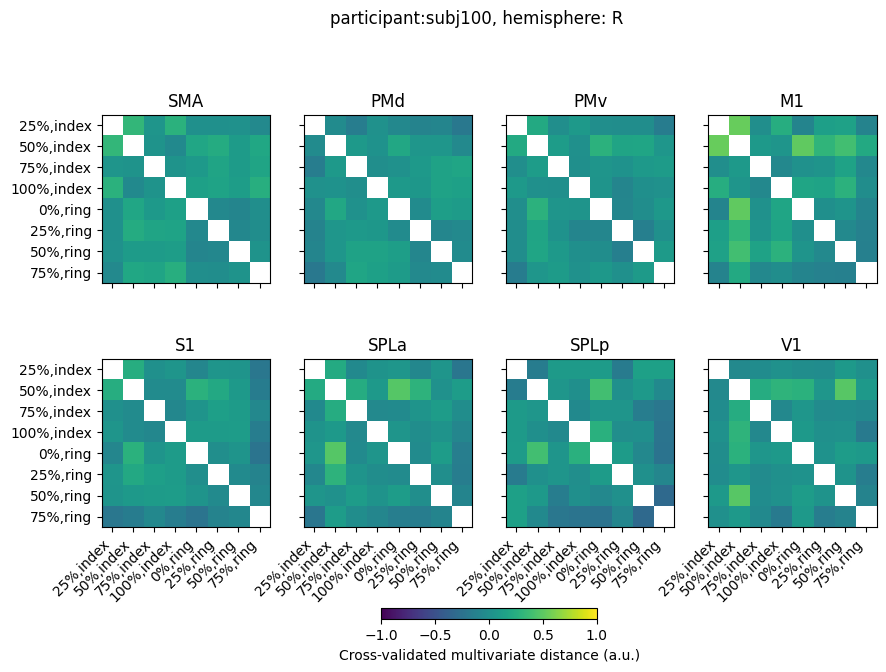

In [70]:
Hem = 'R'
r = 0
vmin, vmax = -1, 1
participant_id='subj100'
fig, axs = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True, figsize=(10, 7))
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        print(f'plotting...glm10.{Hem}.{roi[r]}.hdf5')
        rdms = rsa.rdm.load_rdm(os.path.join(gl.baseDir, experiment, gl.rdmDir, participant_id,f'glm{glm}.{Hem}.{roi[r]}.hdf5'))
        rdms = rdms.subset_pattern(by='conds', value=['25%,index', '50%,index', '75%,index', '100%,index',
                                                      '0%,ring', '25%,ring', '50%,ring', '75%,ring',])
        
        cax = rsa.vis.show_rdm_panel(
                rdms, axs[i, j], rdm_descriptor='roi', cmap='viridis', vmin=vmin, vmax=vmax
            )
        axs[i, j].set_xticks(np.arange(len(rdms.pattern_descriptors['conds'])))
        axs[i, j].set_xticklabels(rdms.pattern_descriptors['conds'], rotation=45, ha='right')
        axs[i, j].set_yticks(axs[i, j].get_xticks())
        axs[i, j].set_yticklabels(rdms.pattern_descriptors['conds'])
        axs[i, j].set_title(roi[r])
        
        # axs[i, j].axhline(0, color='k', ls='-', lw=.8)
        # axs[i, j].axvline(0, color='k', ls='-', lw=.8)
        r += 1
        
cbar = fig.colorbar(cax, ax=axs, orientation='horizontal', fraction=.02)
cbar.set_label('Cross-validated multivariate distance (a.u.)')
fig.suptitle(f'participant:{participant_id}, hemisphere:{Hem}')